In [3]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

target_size = (128, 128)

def process_images(directory_path, target_size=target_size):
    processed_images = []

    image_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.lower().endswith('.jpg')]

    for path in image_paths:
        img = Image.open(path)
        img = img.resize(target_size).convert('L')
        img_array = np.array(img) / 255.0

        img_vector = img_array.flatten()
        processed_images.append(img_vector)

    return processed_images

First 10 pixel values of the first processed image: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


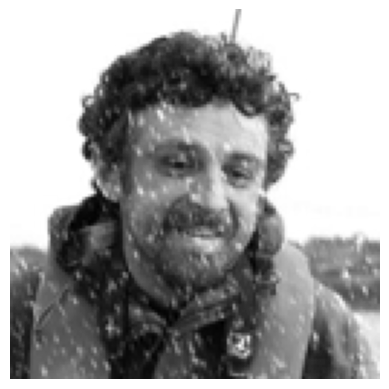

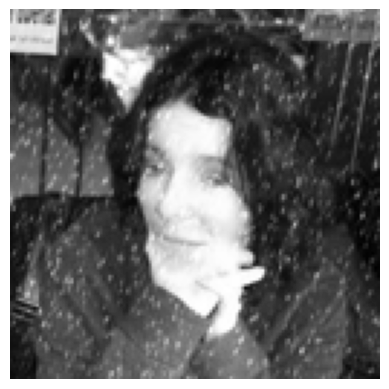

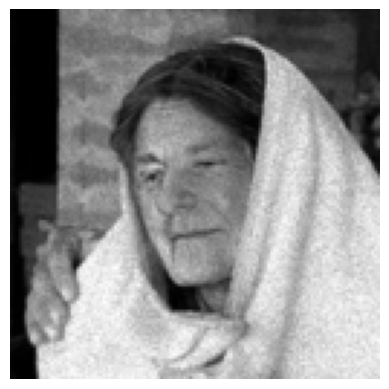

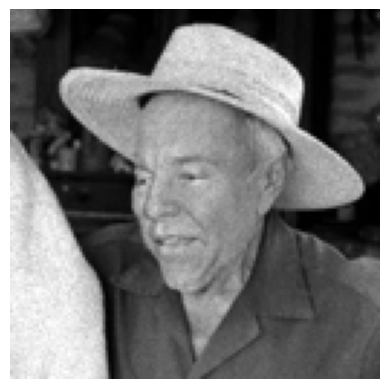

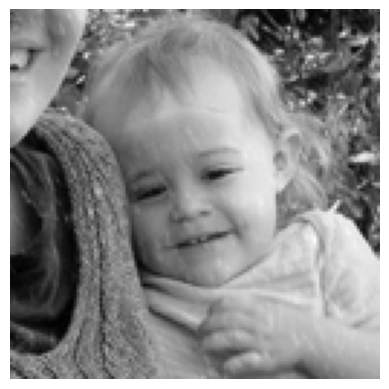

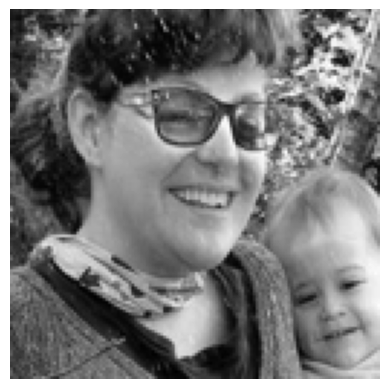

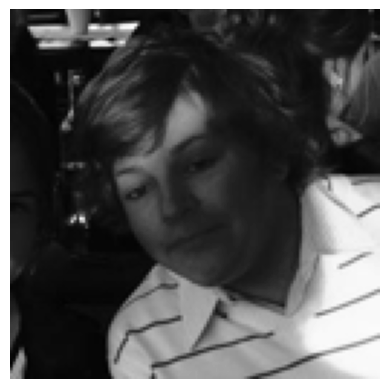

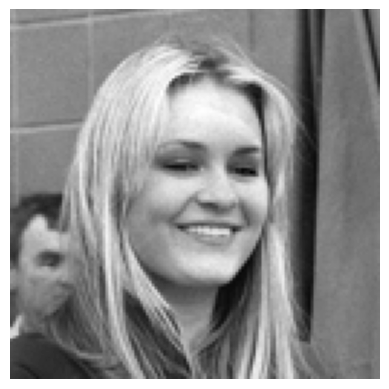

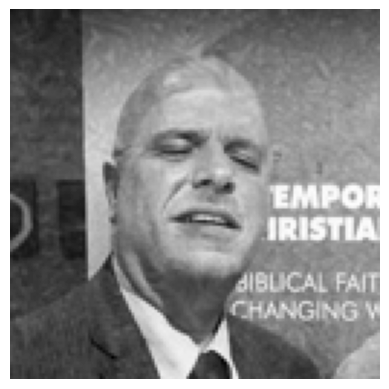

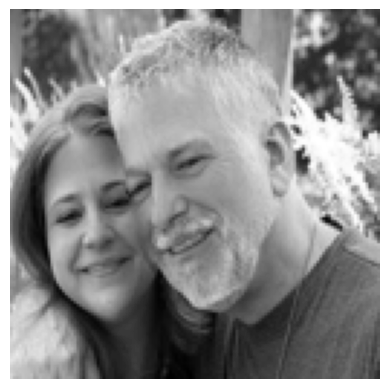

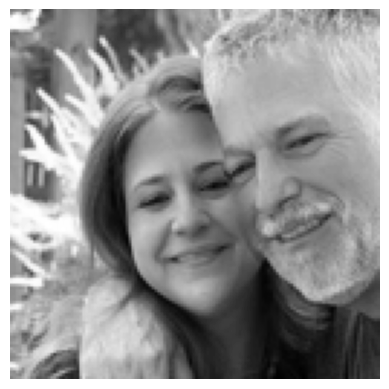

In [4]:
directory_path_fake = '/Users/elenachoochoo/Desktop/techwise-deepfake-classification/datasets/Test/f'
processed_images_fake = process_images(directory_path_fake)

print("First 10 pixel values of the first processed image:", processed_images_fake[0][:10])

for img_vector in processed_images_fake:
    plt.imshow(img_vector.reshape(target_size), cmap='gray')
    plt.axis('off')
    plt.show()

First 10 pixel values of the first processed image: [0.30196078 0.30196078 0.30196078 0.30196078 0.30196078 0.30196078
 0.30588235 0.31372549 0.3254902  0.30588235]


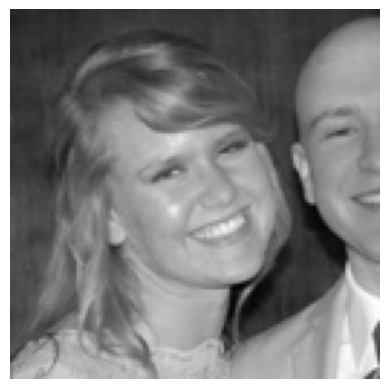

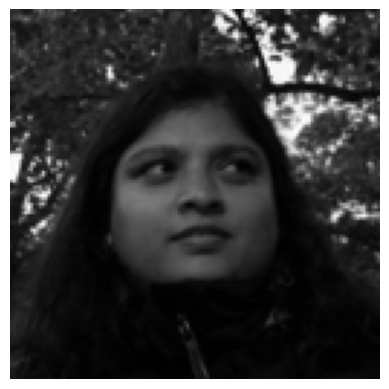

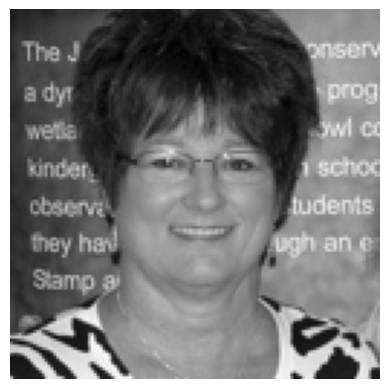

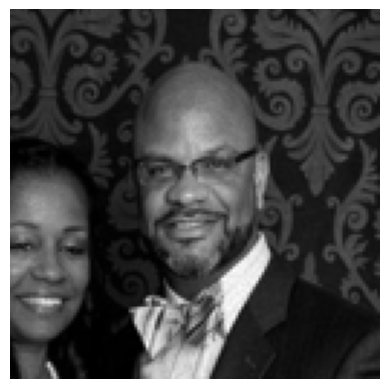

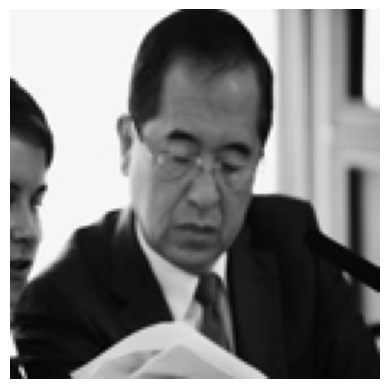

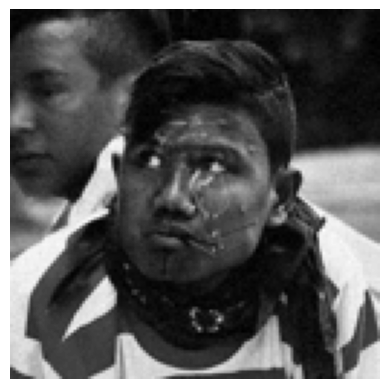

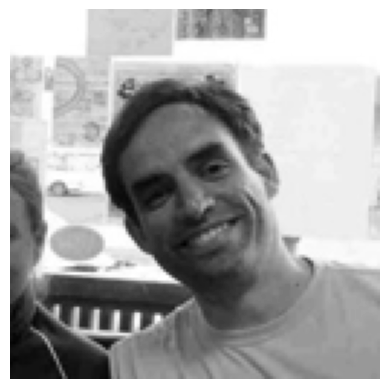

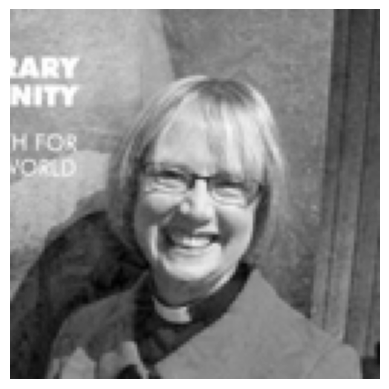

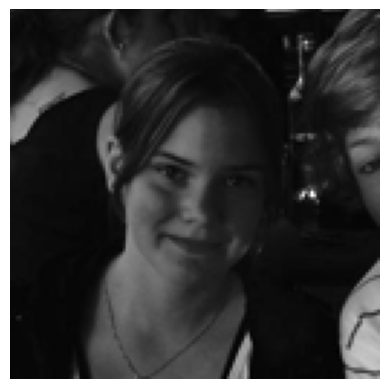

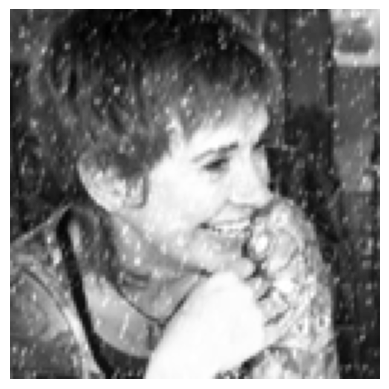

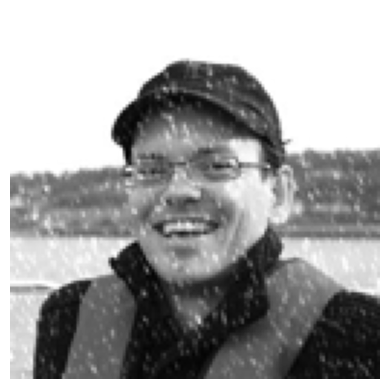

In [5]:
directory_path_real = '/Users/elenachoochoo/Desktop/techwise-deepfake-classification/datasets/Test/r'
processed_images_real = process_images(directory_path_real)

print("First 10 pixel values of the first processed image:", processed_images_real[0][:10])

for img_vector in processed_images_real:
    plt.imshow(img_vector.reshape(target_size), cmap='gray')
    plt.axis('off')
    plt.show()

In [16]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

# Define the target size for image resizing
target_size = (128, 128)

def process_images(directory_path, target_size=target_size):
    """
    Process all .jpg images in a specified directory.

    Args:
    directory_path: Path to the directory containing .jpg images.
    target_size: Optional tuple specifying the size to resize images.

    Returns:
    A list of processed image vectors. Each vector represents a flattened,
    grayscale, normalized image.
    """
    processed_images = []
    image_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.lower().endswith('.jpg')]

    for path in image_paths:
        img = Image.open(path)

        img = img.resize(target_size).convert('L')
        img_array = np.array(img) / 255.0

        img_vector = img_array.flatten()

        processed_images.append(img_vector)

    return processed_images

directory_path_fake = '/Users/elenachoochoo/Desktop/techwise-deepfake-classification/datasets/Test/f'
processed_images_fake = process_images(directory_path_fake)
labels_fake = [0] * len(processed_images_fake)

X_train = np.array(processed_images_fake)
Y_train = np.array(labels_fake, dtype=np.float32)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=len(processed_images_fake[0]), name='input_layer'))
model.add(Dense(units=32, activation='relu', name='hidden_layer'))
model.add(Dense(units=1, activation='sigmoid', name='output_layer'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=32)


Epoch 1/10
1/1 [==============================] - 0s 204ms/step - loss: 0.6651 - accuracy: 0.7273
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 4.2990e-06 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 2.9967e-09 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 8.4934e-12 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 5.7696e-14 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 7.4159e-16 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 1.5738e-17 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 5.0437e-19 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 2.2907e-20 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 1.4055e-21 - accuracy: 1.0000
